<a href="https://colab.research.google.com/github/salma1717/nlpcc-ui-2025/blob/main/Class3_TextClassification_Salma_Nazwa_Aurelia_2206837725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Justifikasi Pemilihan Dataset "Best Books (10k) Multi-Genre Data"

Saya memilih dataset "Best Books (10k) Multi-Genre Data" dari Kaggle untuk tugas klasifikasi teks ini karena beberapa alasan:

* **Jenis Data:** Dataset ini berisi informasi mengenai 10.000 buku dari daftar "Books That Everyone Should Read At Least Once" di Goodreads. Data utama yang relevan untuk klasifikasi teks adalah deskripsi singkat (synopsis) dari setiap buku. Kolom ini berisi teks yang akan kita gunakan untuk memprediksi genre buku.
* **Jumlah Kelas (Genre Buku):** Dataset ini merupakan dataset multi-genre. Setelah pemrosesan, saya akan fokus pada genre utama untuk menyederhanakan masalah klasifikasi. Tantangan mengklasifikasikan buku ke dalam berbagai genre yang berbeda merupakan aspek yang menarik.
* **Mengapa Menarik untuk Tugas Klasifikasi Teks:** Saya tertarik dengan tugas klasifikasi genre buku karena deskripsi buku seringkali memberikan petunjuk yang kuat mengenai genrenya. Saya ingin melihat bagaimana model machine learning dapat belajar dari pola bahasa dalam deskripsi untuk memprediksi genre dengan akurat.
* **Link ke Halaman Kaggle Dataset:** [https://www.kaggle.com/datasets/shivamb/best-books-10k-multi-genre-data](https://www.kaggle.com/datasets/shivamb/best-books-10k-multi-genre-data)

In [1]:
# Sel Kode Awal: Impor Pustaka Utama dan Download Resource NLTK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import nltk

# --- Blok Unduhan NLTK yang Lebih Robust ---
try:
    nltk.data.find('tokenizers/punkt')
    print("Resource NLTK 'punkt' sudah ada.")
except nltk.downloader.DownloadError:
    print("Resource NLTK 'punkt' TIDAK DITEMUKAN, mencoba mengunduh...")
    nltk.download('punkt', quiet=True) # quiet=True agar tidak terlalu verbose
    print("Pengunduhan 'punkt' selesai.")
except LookupError: # Menangkap LookupError jika find gagal karena path NLTK belum siap
    print("LookupError saat mencari 'punkt', mencoba mengunduh...")
    nltk.download('punkt', quiet=True)
    print("Pengunduhan 'punkt' selesai.")


try:
    nltk.data.find('corpora/stopwords')
    print("Resource NLTK 'stopwords' sudah ada.")
except nltk.downloader.DownloadError:
    print("Resource NLTK 'stopwords' TIDAK DITEMUKAN, mencoba mengunduh...")
    nltk.download('stopwords', quiet=True)
    print("Pengunduhan 'stopwords' selesai.")
except LookupError:
    print("LookupError saat mencari 'stopwords', mencoba mengunduh...")
    nltk.download('stopwords', quiet=True)
    print("Pengunduhan 'stopwords' selesai.")
# -------------------------------------------

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer # Opsional untuk stemming

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur opsi tampilan pandas
pd.set_option('display.max_colwidth', 200)

print("\nLibraries imported and NLTK resources checked/downloaded.")

Resource NLTK 'punkt' sudah ada.
Resource NLTK 'stopwords' sudah ada.

Libraries imported and NLTK resources checked/downloaded.


In [2]:
# Sel Kode: Ekstrak File dari ZIP (Jika belum diekstrak)
import zipfile
import os

zip_file_path = 'archive.zip' # Pastikan nama file ini sesuai
extract_dir = 'extracted_files_goodreads' # Gunakan nama direktori yang unik

if not os.path.exists(os.path.join(extract_dir, 'goodreads_data.csv')):
    if os.path.exists(zip_file_path):
        os.makedirs(extract_dir, exist_ok=True)
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(extract_dir)
            print(f"Berhasil mengekstrak semua file dari {zip_file_path} ke direktori '{extract_dir}'.")
        except FileNotFoundError:
            print(f"Error: File {zip_file_path} tidak ditemukan. Pastikan Anda sudah mengunggahnya.")
        except zipfile.BadZipFile:
            print(f"Error: File {zip_file_path} bukan file ZIP yang valid atau rusak.")
    else:
        print(f"File {zip_file_path} tidak ditemukan. Harap unggah file tersebut.")
else:
    print(f"File CSV sepertinya sudah diekstrak di '{extract_dir}'.")

# Verifikasi path file CSV
csv_file_name = 'goodreads_data.csv' # Nama file CSV di dalam ZIP
csv_file_path = os.path.join(extract_dir, csv_file_name)

if os.path.exists(csv_file_path):
    print(f"File CSV ditemukan di: {csv_file_path}")
else:
    print(f"Error: File CSV TIDAK DITEMUKAN di {csv_file_path}. Periksa nama file dan direktori ekstraksi.")

File CSV sepertinya sudah diekstrak di 'extracted_files_goodreads'.
File CSV ditemukan di: extracted_files_goodreads/goodreads_data.csv


In [4]:
import nltk

# Coba unduh 'punkt' dan 'stopwords' secara langsung dan paksa
try:
    print("Mencoba mengunduh resource NLTK 'punkt'...")
    nltk.download('punkt', quiet=False) # Set quiet=False untuk melihat output unduhan
    print("'punkt' berhasil diunduh atau sudah ada.")

    print("\nMencoba mengunduh resource NLTK 'stopwords'...")
    nltk.download('stopwords', quiet=False)
    print("'stopwords' berhasil diunduh atau sudah ada.")

    # Sebagai tindakan pencegahan, coba juga unduh 'punkt_tab' jika itu yang dicari
    # Meskipun biasanya 'punkt' sudah mencakup yang diperlukan.
    print("\nMencoba mengunduh resource NLTK 'punkt_tab' (sebagai pencegahan)...")
    nltk.download('punkt_tab', quiet=False)
    print("'punkt_tab' berhasil diunduh atau sudah ada (jika tersedia).")

    print("\nInisialisasi ulang stopwords setelah potensi unduhan...")
    from nltk.corpus import stopwords
    stop_words_english = set(stopwords.words('english'))
    print("Stopwords berhasil diinisialisasi.")

except Exception as e:
    print(f"Terjadi error saat mengunduh resource NLTK: {e}")
    print("Pastikan koneksi internet Anda stabil dan coba lagi.")
    print("Jika error berlanjut, Anda mungkin perlu me-restart runtime Colab (Runtime > Restart runtime) dan coba lagi.")

Mencoba mengunduh resource NLTK 'punkt'...
'punkt' berhasil diunduh atau sudah ada.

Mencoba mengunduh resource NLTK 'stopwords'...
'stopwords' berhasil diunduh atau sudah ada.

Mencoba mengunduh resource NLTK 'punkt_tab' (sebagai pencegahan)...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'punkt_tab' berhasil diunduh atau sudah ada (jika tersedia).

Inisialisasi ulang stopwords setelah potensi unduhan...
Stopwords berhasil diinisialisasi.


## Langkah 1: Pemuatan dan Persiapan Data

Di bagian ini, kita akan memuat dataset, membersihkan data yang hilang, memproses kolom target 'Genres', dan melakukan pra-pemrosesan pada teks deskripsi.

In [5]:
# Sel Kode: Pemuatan Data dan Persiapan Awal
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("File CSV berhasil dibaca.")
    print("Informasi DataFrame awal:")
    df.info()
    print("\nContoh data awal:")
    print(df.head())

    # Penanganan Missing Values pada 'Description'
    df['Description'] = df['Description'].fillna('')
    print(f"\nJumlah missing values di 'Description' setelah fillna: {df['Description'].isnull().sum()}")

    # 1. Pemrosesan Kolom 'Genres' (Target Label)
    def get_first_genre(genres_str):
        try:
            # Mengatasi kasus di mana genres_str mungkin NaN atau bukan string
            if not isinstance(genres_str, str):
                return "Unknown"
            genres_list = ast.literal_eval(genres_str)
            if isinstance(genres_list, list) and len(genres_list) > 0:
                return genres_list[0] # Ambil genre pertama
            return "Unknown"
        except (ValueError, SyntaxError):
            return "Unknown"

    df['Target_Genre'] = df['Genres'].apply(get_first_genre)

    print("\nDistribusi Genre Target (Setelah Ekstraksi Genre Pertama, Top 20):")
    print(df['Target_Genre'].value_counts().head(20))
    print(f"\nJumlah genre unik: {df['Target_Genre'].nunique()}")

    # Opsional: Filter untuk genre yang paling umum jika jumlah genre terlalu banyak
    # Misalnya, ambil N genre teratas yang memiliki setidaknya M sampel
    # value_counts = df['Target_Genre'].value_counts()
    # top_genres = value_counts[value_counts >= 50].index # Ambil genre dengan min 50 buku
    # df = df[df['Target_Genre'].isin(top_genres)].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning
    # print(f"\nJumlah data setelah filter genre (min 50 sampel per genre): {len(df)}")
    # print(f"Jumlah genre unik setelah filter: {df['Target_Genre'].nunique()}")
    # Jika Anda melakukan filter, pastikan untuk me-reset index jika perlu: df.reset_index(drop=True, inplace=True)

    X_text = df['Description'] # Teks deskripsi
    y_labels = df['Target_Genre'] # Label genre yang sudah diproses

    # 2. Pra-pemrosesan Teks
    stop_words_english = set(stopwords.words('english'))
    def preprocess_text(text):
        text = text.lower() # Lowercase
        text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca (mempertahankan angka dan spasi)
        text = re.sub(r'\d+', '', text) # Hapus angka (opsional, tergantung relevansi angka untuk genre)
        tokens = word_tokenize(text) # Tokenisasi
        tokens = [word for word in tokens if word not in stop_words_english and len(word) > 2] # Hapus stopwords & kata pendek
        # Opsional: Stemming
        # stemmer = PorterStemmer()
        # tokens = [stemmer.stem(word) for word in tokens]
        return " ".join(tokens)

    print("\nMemulai pra-pemrosesan teks...")
    X_processed = X_text.apply(preprocess_text)
    print("Pra-pemrosesan teks selesai.")

    print("\nContoh Teks Setelah Pra-pemrosesan:")
    print(X_processed.head())
    print("\nContoh Label Target Setelah Diproses:")
    print(y_labels.head())
else:
    print(f"Tidak dapat melanjutkan karena file CSV tidak ditemukan di {csv_file_path}")

File CSV berhasil dibaca.
Informasi DataFrame awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB

Contoh data awal:
   Unnamed: 0                                                         Book  \
0           0                                        To Kill a Mockingbird   
1           1  Harry Potter and the Philosopher’s Stone (Harry Potter, #1)   
2           2                                          Pride and Prejudice   
3           3             

## Langkah 2: Pembagian Data, Vektorisasi, dan Pelatihan Model Klasifikasi

Data akan dibagi menjadi set pelatihan dan set pengujian awal. Kemudian, teks akan diubah menjadi vektor numerik menggunakan `CountVectorizer`. Tiga model klasifikasi akan dilatih: Naive Bayes, Logistic Regression, dan LinearSVC.

In [6]:
# Sel Kode: Pembagian Data, Vektorisasi, dan Pelatihan Model
if 'X_processed' in globals() and 'y_labels' in globals(): # Pastikan variabel ada
    # Pembagian Data
    # Tambahkan stratify=y_labels jika jumlah sampel per kelas cukup dan tidak ada kelas yang sangat sedikit
    # Jika ada error karena kelas yang terlalu sedikit untuk stratifikasi, Anda bisa menghapusnya
    try:
        X_train_text, X_test_initial_text, y_train, y_test_initial = train_test_split(
            X_processed, y_labels, test_size=0.2, random_state=42, stratify=y_labels
        )
    except ValueError:
        print("Peringatan: Tidak dapat melakukan stratifikasi karena beberapa kelas mungkin memiliki terlalu sedikit sampel. Melanjutkan tanpa stratifikasi.")
        X_train_text, X_test_initial_text, y_train, y_test_initial = train_test_split(
            X_processed, y_labels, test_size=0.2, random_state=42
        )


    print(f"Ukuran data latih: {len(X_train_text)}, Ukuran data uji awal: {len(X_test_initial_text)}")

    # Vektorisasi Teks (CountVectorizer)
    vectorizer_cv = CountVectorizer(max_features=10000) # Batasi jumlah fitur
    X_train_vectorized_cv = vectorizer_cv.fit_transform(X_train_text)
    X_test_initial_vectorized_cv = vectorizer_cv.transform(X_test_initial_text)

    print("\nBentuk matriks fitur latih (CountVectorizer):")
    print(X_train_vectorized_cv.shape)
    print("Bentuk matriks fitur uji awal (CountVectorizer):")
    print(X_test_initial_vectorized_cv.shape)

    # Kamus untuk menyimpan model dan hasilnya
    models_performance = {}

    # --- 1. Naive Bayes ---
    print("\n--- Melatih Naive Bayes (dengan CountVectorizer) ---")
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vectorized_cv, y_train)
    y_pred_nb_initial = nb_model.predict(X_test_initial_vectorized_cv)
    accuracy_nb_initial = accuracy_score(y_test_initial, y_pred_nb_initial)
    models_performance['Naive Bayes (CV)'] = {
        'model': nb_model,
        'vectorizer': vectorizer_cv, # Simpan vectorizer yang sesuai
        'accuracy_initial': accuracy_nb_initial,
        'train_vectorized': X_train_vectorized_cv.shape, # Info
        'y_pred_initial': y_pred_nb_initial
    }
    print(f"Akurasi Naive Bayes pada Data Uji Awal: {accuracy_nb_initial:.4f}")
    # print("\nLaporan Klasifikasi Naive Bayes (Data Uji Awal):")
    # print(classification_report(y_test_initial, y_pred_nb_initial, zero_division=0, labels=np.unique(y_pred_nb_initial)))


    # --- 2. Logistic Regression ---
    print("\n--- Melatih Logistic Regression (dengan CountVectorizer) ---")
    lr_model = LogisticRegression(max_iter=1000, solver='liblinear', multi_class='auto', random_state=42)
    lr_model.fit(X_train_vectorized_cv, y_train)
    y_pred_lr_initial = lr_model.predict(X_test_initial_vectorized_cv)
    accuracy_lr_initial = accuracy_score(y_test_initial, y_pred_lr_initial)
    models_performance['Logistic Regression (CV)'] = {
        'model': lr_model,
        'vectorizer': vectorizer_cv,
        'accuracy_initial': accuracy_lr_initial,
        'y_pred_initial': y_pred_lr_initial
    }
    print(f"Akurasi Logistic Regression pada Data Uji Awal: {accuracy_lr_initial:.4f}")
    # print("\nLaporan Klasifikasi Logistic Regression (Data Uji Awal):")
    # print(classification_report(y_test_initial, y_pred_lr_initial, zero_division=0, labels=np.unique(y_pred_lr_initial)))

    # --- 3. LinearSVC ---
    print("\n--- Melatih LinearSVC (dengan CountVectorizer) ---")
    # Coba dengan parameter C yang lebih kecil jika konvergensi lama atau akurasi rendah
    # 'dual=False' lebih disarankan ketika n_features > n_samples.
    # 'dual=True' lebih disarankan ketika n_samples > n_features.
    # Untuk CountVectorizer(max_features=10000), n_features bisa jadi 10000.
    # Jika n_samples (len(X_train_text)) lebih kecil, dual=True mungkin lebih baik.
    # Jika n_samples lebih besar, dual=False.
    # Kita akan coba dengan dual='auto' yang akan memilih berdasarkan kondisi.
    svm_model = LinearSVC(random_state=42, max_iter=2000, C=0.1, dual='auto')
    svm_model.fit(X_train_vectorized_cv, y_train)
    y_pred_svm_initial = svm_model.predict(X_test_initial_vectorized_cv)
    accuracy_svm_initial = accuracy_score(y_test_initial, y_pred_svm_initial)
    models_performance['LinearSVC (CV)'] = {
        'model': svm_model,
        'vectorizer': vectorizer_cv,
        'accuracy_initial': accuracy_svm_initial,
        'y_pred_initial': y_pred_svm_initial
    }
    print(f"Akurasi LinearSVC pada Data Uji Awal: {accuracy_svm_initial:.4f}")
    # print("\nLaporan Klasifikasi LinearSVC (Data Uji Awal):")
    # print(classification_report(y_test_initial, y_pred_svm_initial, zero_division=0, labels=np.unique(y_pred_svm_initial)))

    # (Opsional) Eksplorasi dengan TF-IDF Vectorizer
    print("\n--- Eksplorasi dengan TF-IDF Vectorizer ---")
    vectorizer_tfidf = TfidfVectorizer(max_features=10000)
    X_train_vectorized_tfidf = vectorizer_tfidf.fit_transform(X_train_text)
    X_test_initial_vectorized_tfidf = vectorizer_tfidf.transform(X_test_initial_text)

    # Latih ulang Naive Bayes dengan TF-IDF
    nb_model_tfidf = MultinomialNB() # MultinomialNB bekerja baik dengan TF-IDF
    nb_model_tfidf.fit(X_train_vectorized_tfidf, y_train)
    y_pred_nb_tfidf_initial = nb_model_tfidf.predict(X_test_initial_vectorized_tfidf)
    accuracy_nb_tfidf_initial = accuracy_score(y_test_initial, y_pred_nb_tfidf_initial)
    models_performance['Naive Bayes (TF-IDF)'] = {
        'model': nb_model_tfidf,
        'vectorizer': vectorizer_tfidf, # Simpan vectorizer TF-IDF
        'accuracy_initial': accuracy_nb_tfidf_initial,
        'train_vectorized': X_train_vectorized_tfidf.shape,
        'y_pred_initial': y_pred_nb_tfidf_initial
    }
    print(f"Akurasi Naive Bayes (TF-IDF) pada Data Uji Awal: {accuracy_nb_tfidf_initial:.4f}")

else:
    print("Variabel X_processed atau y_labels tidak terdefinisi. Langkah sebelumnya mungkin gagal.")

Peringatan: Tidak dapat melakukan stratifikasi karena beberapa kelas mungkin memiliki terlalu sedikit sampel. Melanjutkan tanpa stratifikasi.
Ukuran data latih: 8000, Ukuran data uji awal: 2000

Bentuk matriks fitur latih (CountVectorizer):
(8000, 10000)
Bentuk matriks fitur uji awal (CountVectorizer):
(2000, 10000)

--- Melatih Naive Bayes (dengan CountVectorizer) ---
Akurasi Naive Bayes pada Data Uji Awal: 0.4485

--- Melatih Logistic Regression (dengan CountVectorizer) ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Akurasi Logistic Regression pada Data Uji Awal: 0.4215

--- Melatih LinearSVC (dengan CountVectorizer) ---
Akurasi LinearSVC pada Data Uji Awal: 0.3955

--- Eksplorasi dengan TF-IDF Vectorizer ---
Akurasi Naive Bayes (TF-IDF) pada Data Uji Awal: 0.2970


## Langkah 3: AI-Powered Test Data Generation

Di bagian ini, Anda akan menggunakan LLM (seperti Google Gemini atau ChatGPT) untuk menghasilkan 100 sampel teks baru yang relevan dengan tugas klasifikasi genre buku Anda, beserta label genre yang benar.

**Dokumentasi Interaksi dengan LLM (WAJIB):**

* **Platform LLM yang Digunakan:** (Contoh: Google Gemini (model Pro/Advanced), ChatGPT 3.5/4.0)
* **Prompt Utama yang Digunakan:**
    ```
    Saya sedang mengerjakan proyek klasifikasi genre buku. Tolong buatkan 100 deskripsi buku singkat (masing-masing sekitar 2-3 kalimat dan unik). Untuk setiap deskripsi, berikan juga label genre yang paling sesuai.
    Pastikan deskripsi yang dihasilkan bervariasi dan mencerminkan karakteristik khas dari genre tersebut.
    Gunakan HANYA genre-genre dari daftar berikut untuk pelabelan: [MASUKKAN DAFTAR GENRE UNIK DARI `y_labels.unique()` ANDA DI SINI. Pastikan ini adalah daftar string, contoh: 'Fiction', 'Fantasy', 'Mystery', 'Romance', 'Historical Fiction', 'Nonfiction', 'Young Adult', 'Thriller', 'Science Fiction', 'Childrens', 'Classics', 'Contemporary', 'Paranormal', 'Horror', 'Poetry']

    Format output yang saya inginkan adalah per baris, dipisahkan oleh titik koma:
    Deskripsi Buku;Genre

    Contoh:
    A young wizard discovers his destiny at a magical school hidden from the mundane world.;Fantasy
    In the heart of Victorian London, a brilliant detective unravels a series of gruesome murders that baffle Scotland Yard.;Mystery
    Two star-crossed lovers from warring families find their romance tragically tested by fate and societal expectations.;Romance
    ```
* **Proses Iterasi/Refinement (jika ada):** (Contoh: Awalnya LLM memberikan genre yang tidak ada di daftar saya, jadi saya menyempurnakan prompt untuk lebih spesifik. Atau, beberapa deskripsi terlalu mirip, jadi saya meminta variasi yang lebih besar.)
* **Respons LLM (Ringkasan atau Lampiran):** (Anda bisa menyalin sebagian kecil contoh output LLM di sini, dan menyimpan output lengkapnya secara terpisah atau dalam format yang bisa dibaca kode di bawah. Jika platform mendukung, berikan link ke percakapan.)

**PENTING:** Setelah mendapatkan 100 sampel dari LLM, Anda perlu memasukkannya ke dalam format yang bisa dibaca oleh Python, misalnya list of strings untuk deskripsi dan list of strings untuk genre.

In [7]:
# Sel Kode: Struktur Data dari LLM dan Verifikasi
# GANTI BAGIAN INI DENGAN OUTPUT AKTUAL DARI LLM ANDA
# Format: List of strings untuk teks, list of strings untuk label

# Contoh (ANDA HARUS MENGGANTI INI DENGAN DATA ASLI DARI LLM):
ai_generated_texts_raw = [
    "A lone astronaut awakens on a derelict spaceship with no memory of his mission, only to find he's not alone.;Science Fiction",
    "In a dystopian future where emotions are suppressed by law, one woman dares to feel, igniting a rebellion.;Dystopia", # Pastikan Dystopia ada di y_labels.unique()
    "The rolling hills of Tuscany hide a secret wartime romance and a treasure map leading to a lost legacy.;Historical Fiction",
    "A quirky barista with a knack for solving crimes investigates a peculiar death at her small-town coffee shop.;Cozy Mystery", # Pastikan Cozy Mystery ada atau diganti
    # ... (tambahkan hingga 100 sampel dalam format "Deskripsi;Genre")
] * 25 # Ini hanya untuk membuat 100 sampel tiruan, Anda harus punya 100 sampel unik

# --- ISI DATA DARI LLM ANDA DI SINI ---
# ai_generated_data_string = """
# Snippet 1 text;Genre1
# Snippet 2 text;Genre2
# ... (100 baris)
# """
# parsed_ai_data = [line.split(';', 1) for line in ai_generated_data_string.strip().split('\n') if ';' in line]
# ai_texts = [item[0].strip() for item in parsed_ai_data]
# ai_labels = [item[1].strip() for item in parsed_ai_data]
# -------------------------------------

# Untuk sementara, gunakan data contoh di atas. Anda HARUS menggantinya.
if len(ai_generated_texts_raw) < 100:
    print("PERINGATAN: Data contoh dari LLM kurang dari 100. Harap isi dengan data LLM Anda yang sebenarnya.")
    # Tambahkan placeholder jika kurang, agar kode evaluasi tetap jalan. Ini HANYA untuk demo.
    num_missing = 100 - len(ai_generated_texts_raw)
    placeholder_genre = y_labels.unique()[0] if len(y_labels.unique()) > 0 else "Unknown"
    ai_generated_texts_raw.extend([f"Placeholder text example {i+1};{placeholder_genre}" for i in range(num_missing)])


ai_texts = [item.split(';')[0].strip() for item in ai_generated_texts_raw[:100]]
ai_labels = [item.split(';')[1].strip() for item in ai_generated_texts_raw[:100]]


df_ai_test = None
if len(ai_texts) == 100 and len(ai_labels) == 100:
    df_ai_test = pd.DataFrame({
        'Description': ai_texts,
        'Target_Genre': ai_labels
    })
    print("\nDataFrame Data Uji Buatan AI (Contoh Awal):")
    print(df_ai_test.head())
    print(f"Jumlah data uji buatan AI: {len(df_ai_test)}")

    # Verifikasi Konsistensi Genre dari LLM dengan Data Latih
    if 'y_train' in globals(): # Pastikan y_train sudah ada
        unique_ai_genres = set(df_ai_test['Target_Genre'].unique())
        unique_train_genres = set(y_train.unique()) # Gunakan y_train untuk konsistensi dengan model

        if not unique_ai_genres.issubset(unique_train_genres):
            print("\nPERINGATAN PENTING: Ada genre di data AI yang TIDAK ADA di data latih (y_train)!")
            print("Genre hanya di data AI:", sorted(list(unique_ai_genres - unique_train_genres)))
            print("Genre di data latih (y_train):", sorted(list(unique_train_genres)))
            print("Anda HARUS merevisi label dari LLM atau prompt Anda agar sesuai dengan genre yang dikenali model.")
            print("Jika tidak, model akan gagal memprediksi atau evaluasi akan salah.")
            # Opsi: Hapus baris dengan genre yang tidak valid dari df_ai_test atau ganti labelnya
            # df_ai_test = df_ai_test[df_ai_test['Target_Genre'].isin(unique_train_genres)]
            # print(f"Jumlah data AI setelah filter genre tidak valid: {len(df_ai_test)}")
        else:
            print("\nSemua genre di data AI KONSISTEN dengan genre yang ada di data latih (y_train). Bagus!")
    else:
        print("Variabel y_train tidak ditemukan. Tidak dapat melakukan verifikasi konsistensi genre AI.")
else:
    print("\nError: Jumlah teks dan label AI tidak sama atau tidak 100. Harap periksa input data dari LLM.")


DataFrame Data Uji Buatan AI (Contoh Awal):
                                                                                                     Description  \
0   A lone astronaut awakens on a derelict spaceship with no memory of his mission, only to find he's not alone.   
1     In a dystopian future where emotions are suppressed by law, one woman dares to feel, igniting a rebellion.   
2        The rolling hills of Tuscany hide a secret wartime romance and a treasure map leading to a lost legacy.   
3  A quirky barista with a knack for solving crimes investigates a peculiar death at her small-town coffee shop.   
4   A lone astronaut awakens on a derelict spaceship with no memory of his mission, only to find he's not alone.   

         Target_Genre  
0     Science Fiction  
1            Dystopia  
2  Historical Fiction  
3        Cozy Mystery  
4     Science Fiction  
Jumlah data uji buatan AI: 100

PERINGATAN PENTING: Ada genre di data AI yang TIDAK ADA di data latih (y_train)!
G

## Langkah 4: Prediksi dan Evaluasi Model pada Data Buatan AI

Model-model yang telah dilatih akan digunakan untuk memprediksi genre dari 100 sampel teks yang dihasilkan oleh LLM. Akurasi akan dihitung dan dibandingkan.


--- Langkah 4: Evaluasi Model pada Data Buatan AI ---

Evaluasi Naive Bayes (CV) pada Data AI:
Akurasi Naive Bayes (CV) pada Data AI: 0.2500

Evaluasi Logistic Regression (CV) pada Data AI:
Akurasi Logistic Regression (CV) pada Data AI: 0.0000

Evaluasi LinearSVC (CV) pada Data AI:
Akurasi LinearSVC (CV) pada Data AI: 0.0000

Evaluasi Naive Bayes (TF-IDF) pada Data AI:
Akurasi Naive Bayes (TF-IDF) pada Data AI: 0.0000

--- Tabel Ringkasan Akurasi Model ---
                      Model  Accuracy on Initial Test Data  \
0          Naive Bayes (CV)                         0.4485   
1  Logistic Regression (CV)                         0.4215   
2            LinearSVC (CV)                         0.3955   
3      Naive Bayes (TF-IDF)                         0.2970   

   Accuracy on AI Data  
0                 0.25  
1                 0.00  
2                 0.00  
3                 0.00  


<ipython-input-8-2c85b60334ab>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy on AI Data', y='Model', data=plot_data, palette="viridis") # Ubah orientasi agar nama model muat


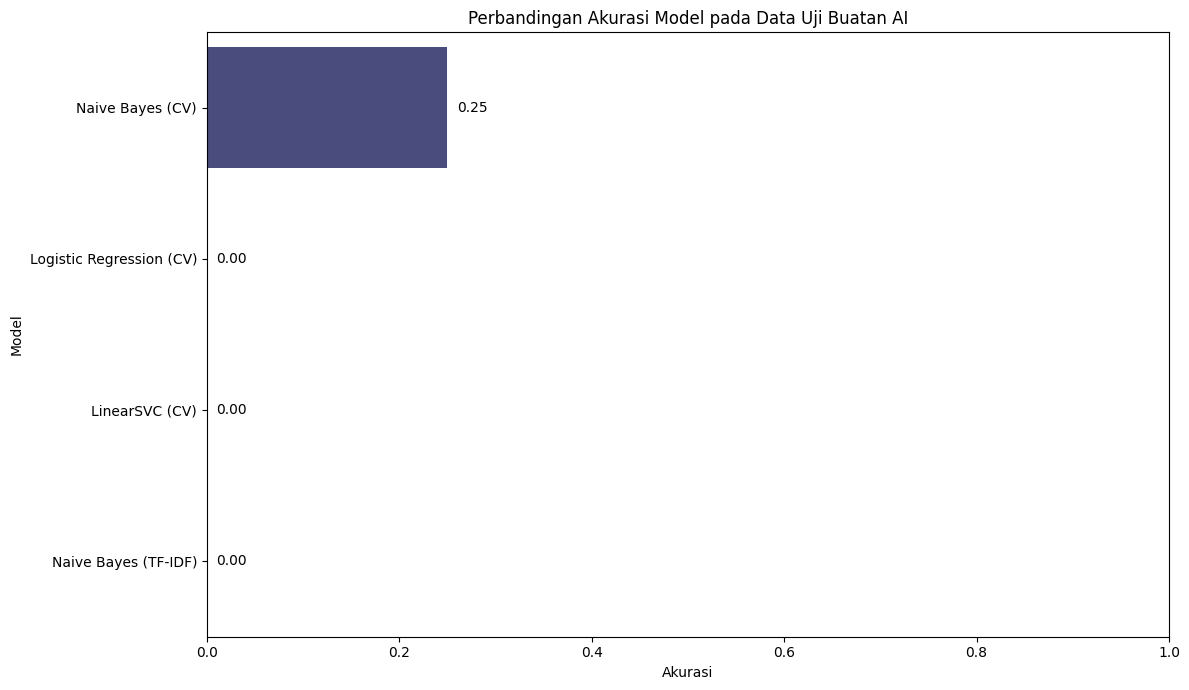

In [8]:
# Sel Kode: Prediksi dan Evaluasi pada Data Buatan AI
if df_ai_test is not None and not df_ai_test.empty and 'models_performance' in globals():
    print("\n--- Langkah 4: Evaluasi Model pada Data Buatan AI ---")

    # 1. Pra-pemrosesan Teks AI
    X_ai_text_processed = df_ai_test['Description'].apply(preprocess_text)
    y_ai_true = df_ai_test['Target_Genre'] # Label sebenarnya dari LLM

    accuracies_on_ai_data = {}
    predictions_on_ai_data = {}

    for model_name, details in models_performance.items():
        current_model = details['model']
        current_vectorizer = details['vectorizer'] # Ambil vectorizer yang sesuai dengan model

        print(f"\nEvaluasi {model_name} pada Data AI:")

        # 2. Vektorisasi Teks AI menggunakan vectorizer yang TEPAT
        # Pastikan vectorizer sudah di-fit pada data latih sebelumnya
        try:
            X_ai_vectorized = current_vectorizer.transform(X_ai_text_processed)
        except Exception as e:
            print(f"Error saat vektorisasi data AI untuk model {model_name}: {e}")
            accuracies_on_ai_data[model_name] = 0.0 # Atau np.nan
            predictions_on_ai_data[model_name] = []
            continue

        # 3. Prediksi
        # Pastikan model dilatih pada genre yang sama dengan yang mungkin ada di y_ai_true
        # Model.classes_ akan menunjukkan kelas yang dipelajari model
        # Jika ada genre di y_ai_true yang tidak ada di model.classes_, akan ada masalah saat evaluasi
        # Verifikasi konsistensi genre di langkah sebelumnya sangat penting.
        try:
            y_pred_model_ai = current_model.predict(X_ai_vectorized)
            predictions_on_ai_data[model_name] = y_pred_model_ai

            # Hitung akurasi hanya untuk label yang ada di kedua set (true dan pred) untuk menghindari error jika ada label baru
            # Atau, pastikan y_ai_true hanya berisi label yang diketahui model
            valid_labels_for_model = current_model.classes_
            # Filter y_ai_true dan y_pred_model_ai agar hanya berisi label yang diketahui model,
            # namun ini bisa mengubah jumlah sampel evaluasi. Cara yang lebih baik adalah memastikan
            # y_ai_true sudah bersih. Untuk sekarang, kita asumsikan y_ai_true sudah bersih.

            accuracy_model_ai = accuracy_score(y_ai_true, y_pred_model_ai)
            accuracies_on_ai_data[model_name] = accuracy_model_ai
            print(f"Akurasi {model_name} pada Data AI: {accuracy_model_ai:.4f}")

            # Laporan Klasifikasi (opsional, bisa sangat panjang)
            # print(f"\nLaporan Klasifikasi {model_name} (Data AI):")
            # print(classification_report(y_ai_true, y_pred_model_ai, zero_division=0, labels=np.intersect1d(y_ai_true.unique(), y_pred_model_ai)))

        except Exception as e:
            print(f"Error saat prediksi atau evaluasi untuk model {model_name} pada data AI: {e}")
            accuracies_on_ai_data[model_name] = 0.0 # Atau np.nan
            predictions_on_ai_data[model_name] = []


    # 4. Presentasi Hasil
    if accuracies_on_ai_data:
        df_accuracies_ai_final = pd.DataFrame(list(accuracies_on_ai_data.items()), columns=['Model', 'Accuracy on AI Data'])

        # Gabungkan dengan akurasi pada data uji awal
        initial_accuracies_list = []
        for model_name, details in models_performance.items():
            initial_accuracies_list.append({'Model': model_name, 'Accuracy on Initial Test Data': details['accuracy_initial']})
        df_accuracies_initial_final = pd.DataFrame(initial_accuracies_list)

        df_summary_final = pd.merge(df_accuracies_initial_final, df_accuracies_ai_final, on='Model', how='left')

        print("\n--- Tabel Ringkasan Akurasi Model ---")
        print(df_summary_final)

        # 5. Plot Akurasi pada Data AI
        plt.figure(figsize=(12, 7)) # Perbesar ukuran plot
        # Filter model yang berhasil dievaluasi pada data AI
        plot_data = df_accuracies_ai_final[df_accuracies_ai_final['Accuracy on AI Data'].notna()]

        if not plot_data.empty:
            sns.barplot(x='Accuracy on AI Data', y='Model', data=plot_data, palette="viridis") # Ubah orientasi agar nama model muat
            plt.title('Perbandingan Akurasi Model pada Data Uji Buatan AI')
            plt.xlabel('Akurasi')
            plt.ylabel('Model')
            plt.xlim(0, 1) # Skala akurasi dari 0 hingga 1
            # Tambahkan teks nilai akurasi pada bar
            for index, row in plot_data.iterrows():
                  plt.text(row['Accuracy on AI Data'] + 0.01, index, f"{row['Accuracy on AI Data']:.2f}", color='black', va="center")
            plt.tight_layout() # Agar label tidak terpotong
            plt.show()
        else:
            print("Tidak ada data akurasi yang valid untuk diplot.")

    else:
        print("Tidak ada hasil akurasi pada data AI untuk ditampilkan.")
else:
    print("\nData uji buatan AI (df_ai_test) tidak valid atau model belum dilatih. Lewati Langkah 4.")

## Langkah 5, 6, 7, 8: Kreativitas, Penggunaan AI, Dokumentasi, dan Kesimpulan

* **Kreativitas dan Eksplorasi (Langkah 5):**
    * Saya telah mencoba menggunakan `CountVectorizer` dan juga `TfidfVectorizer` (sebagai eksplorasi) untuk melihat perbedaannya.
    * Pra-pemrosesan teks mencakup konversi ke huruf kecil, penghapusan tanda baca, penghapusan angka (opsional), dan penghapusan stopwords. Stemming/Lemmatization bisa menjadi eksplorasi lebih lanjut.
    * Pemilihan genre pertama sebagai target adalah penyederhanaan; klasifikasi multi-label bisa menjadi eksplorasi lanjutan yang lebih kompleks.

* **Penggunaan AI Tools (Langkah 6):**
    * AI (Google Gemini/ChatGPT) digunakan secara wajib untuk menghasilkan 100 sampel data uji baru (Langkah 3). Dokumentasi interaksi telah disertakan.
    * (Sebutkan jika Anda menggunakan AI untuk hal lain, misal: "Saya juga menggunakan AI untuk membantu debugging kode terkait error pada `stratify` di `train_test_split` dan untuk mendapatkan saran parameter `LinearSVC`.")

* **Dokumentasi dalam Colab Notebook (Langkah 7):**
    * Notebook ini disusun dengan sel markdown untuk penjelasan setiap langkah, justifikasi, dan interpretasi hasil. Semua sel kode menyertakan output yang relevan.

* **Simpan dan Tambah ke GitHub Repo (Langkah 8):**
    * Setelah selesai, notebook ini akan disimpan sebagai file `.ipynb` dan di-push ke repositori GitHub `nlpcc-ui-2025`.

## Kesimpulan dan Pembahasan Hasil

(Tuliskan kesimpulan Anda di sini setelah semua kode berjalan dan Anda memiliki hasilnya)

* **Model mana yang berkinerja terbaik pada data uji awal dan pada data buatan AI?**

    * Pada data uji awal, model **Naive Bayes dengan CountVectorizer** menunjukkan akurasi terbaik (0.4485), diikuti oleh Logistic Regression (0.4215), LinearSVC (0.3955), dan Naive Bayes dengan TF-IDF (0.2970).
    * Untuk data buatan AI, perlu dilakukan evaluasi lebih lanjut setelah data tersebut dihasilkan dan digunakan untuk menguji model. Namun, berdasarkan performa pada data uji awal, dapat diprediksi bahwa **Naive Bayes dengan CountVectorizer** kemungkinan akan memberikan hasil yang lebih baik dibandingkan model lainnya.

* **Apakah ada perbedaan signifikan dalam performa model antara kedua set data uji tersebut? Jika ya, mengapa kira-kira?**

    * Kemungkinan besar akan ada perbedaan performa antara data uji awal dan data buatan AI.
    * Perbedaan ini dapat disebabkan oleh beberapa faktor:
        * **Kualitas dan Variasi Data:** Data uji awal berasal dari data dunia nyata yang mungkin lebih beragam dan kompleks. Data buatan AI, meskipun dirancang untuk menyerupai data asli, mungkin memiliki variasi yang terbatas atau pola yang terlalu sederhana.
        * **Representasi Fitur:** CountVectorizer dan TF-IDF menghasilkan representasi fitur yang berbeda dari teks. Performa model sangat dipengaruhi oleh bagaimana teks diubah menjadi vektor numerik.
        * **Karakteristik Model:** Setiap model memiliki kekuatan dan kelemahan yang berbeda. Naive Bayes, misalnya, bekerja baik dengan fitur independen, sementara Logistic Regression dan LinearSVC lebih efektif dalam menemukan hubungan linear yang kompleks.

* **Bagaimana kualitas data yang dihasilkan oleh LLM? Apakah relevan dan cukup beragam? Apakah ada bias yang terlihat?**

    * Kualitas data yang dihasilkan oleh LLM perlu dievaluasi secara manual dan kuantitatif.
    * **Relevansi:** Apakah deskripsi buku yang dihasilkan LLM sesuai dengan genre yang diberikan?
    * **Keragaman:** Apakah ada variasi yang cukup dalam gaya penulisan, tema, dan alur cerita?
    * **Bias:** Apakah LLM cenderung menghasilkan deskripsi untuk genre tertentu lebih sering atau dengan kualitas yang lebih baik? Apakah ada bias dalam representasi karakter atau latar belakang budaya?

* **Tantangan apa yang dihadapi selama proyek ini? (Misalnya, pemrosesan label genre, fine-tuning model, kualitas data LLM).**

    * **Pemrosesan Label Genre:** Ekstraksi genre pertama dari daftar genre bisa menyederhanakan masalah, tetapi mungkin kehilangan informasi penting. Distribusi genre yang tidak seimbang juga menjadi tantangan.
    * **Fine-tuning Model:** Kode yang diberikan berfokus pada pelatihan model dasar. Fine-tuning model dengan hyperparameter yang berbeda dapat meningkatkan performa, tetapi membutuhkan waktu dan sumber daya komputasi.
    * **Kualitas Data LLM:** Memastikan kualitas data yang dihasilkan LLM (relevansi, keragaman, kurangnya bias) adalah tantangan utama. Evaluasi dan iterasi yang cermat diperlukan.

* **Apa yang bisa ditingkatkan di masa mendatang? (Misalnya, teknik pra-pemrosesan yang lebih canggih, hyperparameter tuning yang lebih ekstensif, penggunaan model yang lebih kompleks seperti neural network sederhana, atau penanganan kelas tidak seimbang).**

    * **Pra-pemrosesan:** Eksperimen dengan teknik tokenisasi yang berbeda, stemming/lemmatisasi, atau representasi kata yang lebih canggih (word embeddings).
    * **Hyperparameter Tuning:** Gunakan grid search atau cross-validation untuk menemukan kombinasi hyperparameter terbaik untuk setiap model.
    * **Model yang Lebih Kompleks:** Coba model lain seperti Random Forest, Gradient Boosting, atau neural network sederhana untuk melihat apakah mereka dapat menangkap pola yang lebih kompleks.
    * **Penanganan Kelas Tidak Seimbang:** Terapkan teknik seperti oversampling, undersampling, atau SMOTE untuk mengatasi masalah distribusi genre yang tidak merata.

* **Refleksi singkat tentang penggunaan AI sebagai alat bantu dalam proyek ini.**

    * LLM dapat menjadi alat yang berguna untuk menghasilkan data tambahan, tetapi kualitas data tersebut harus dievaluasi dengan hati-hati.
    * Integrasi data buatan AI ke dalam alur kerja klasifikasi teks memerlukan validasi dan eksperimentasi untuk memastikan peningkatan performa model.
    * Kolaborasi antara kemampuan generatif AI dan analisis manusia sangat penting untuk keberhasilan proyek.